 # Library Imports

In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Configure visualization settings
sns.set_context("notebook", font_scale=1.5)

# Mount Google Drive to access files
# Skip remounting if already mounted
try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
    print("Drive already mounted or not in Colab environment.")

file_path = '/content/drive/My Drive/Fintech/businessCase2/Dataset4_EWS.xlsx'


Mounted at /content/drive


# Data Loading

From Bloomberg, consisting of weekly observations of:

- Market and macroeconomic indicators (e.g., indices, rates).
- A response variable `Y` indicating **anomalous periods** (e.g., market stress events).

In [2]:
# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Load the data from the Excel file
# First sheet contains market data with dates and anomaly labels, second sheet contains metadata
data_df = pd.read_excel(file_path, sheet_name='Markets')
metadata_df = pd.read_excel(file_path, sheet_name='Metadata')

# Check the structure of the loaded data
print("Data columns:", data_df.columns.tolist())

# Extract date and anomaly label columns
date_col = 'Date' if 'Date' in data_df.columns else data_df.columns[0]
y_col = 'Y' if 'Y' in data_df.columns else None

# Convert dates to datetime format
data_df[date_col] = pd.to_datetime(data_df[date_col], dayfirst=True)  # Date format is dd/mm/yy

# Set date as index
data_df = data_df.set_index(date_col)

# Extract features (all columns except Y if it exists)
if y_col:
    X_df = data_df.drop(y_col, axis=1)
    y = data_df[y_col].values
else:
    X_df = data_df
    y = None

# Display basic information about the dataset
print(f"Data shape: {X_df.shape}")
print(f"Total number of records: {len(X_df)}")
print(f"Time period: from {X_df.index.min().strftime('%m/%d/%Y')} to {X_df.index.max().strftime('%m/%d/%Y')}")
print(f"Frequency: {pd.infer_freq(X_df.index) or 'Weekly'}")
print(f"Number of variables: {X_df.shape[1]}")
if y_col:
    print(f"Number of anomalies: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")

# Create a more comprehensive metadata table with additional statistics
enhanced_metadata = []

# Determine the correct column names for ticker and description
ticker_col = 'ticker' if 'ticker' in metadata_df.columns else metadata_df.columns[0]
desc_col = 'description' if 'description' in metadata_df.columns else metadata_df.columns[1] if len(metadata_df.columns) > 1 else ticker_col

for ticker in X_df.columns:
    # Get metadata for this ticker if available
    meta_row = metadata_df[metadata_df[ticker_col] == ticker] if ticker in metadata_df[ticker_col].values else pd.DataFrame()

    # Get description or use ticker if not found
    description = meta_row[desc_col].values[0] if not meta_row.empty and desc_col in meta_row.columns else ticker

    # Calculate statistics for this series
    series = X_df[ticker]

    enhanced_metadata.append({
        'Ticker': ticker,
        'Description': description,
        'Mean': series.mean(),
        'Std.Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Missing values': series.isna().sum(),
        'Missing (%)': f"{series.isna().mean()*100:.2f}%"
    })

# Create enhanced metadata dataframe
enhanced_meta_df = pd.DataFrame(enhanced_metadata)

# Display the enhanced metadata
print("\nMetadata and statistics:")
display(enhanced_meta_df)

Data columns: ['Data', 'BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL', 'Y']
Data shape: (1111, 42)
Total number of records: 1111
Time period: from 01/11/2000 to 04/20/2021
Frequency: W-TUE
Number of variables: 42
Number of anomalies: 237 (21.33%)

Metadata and statistics:


,Ticker,Description,Mean,Std.Dev,Min,Max,Missing values,Missing (%)
0,BDIY,Baltic Dry Index,2259.860486,2017.811888,291.00000,11793.00000,0,0.00%
1,CRY,TR/CC CRB ER Index,245.247649,68.278081,106.29290,467.57000,0,0.00%
2,Cl1,Generic 1st 'CL' Future,60.708101,25.900813,10.01000,140.97000,0,0.00%
3,DXY,DOLLAR INDEX SPOT,90.934982,11.379095,71.32900,119.82000,0,0.00%
4,ECSURPUS,Bloomberg ECO US Surprise Inde,0.036153,0.349453,-0.97400,0.99100,0,0.00%
5,EMUSTRUU,EM USD Aggregate,704.379495,309.951768,230.52670,1286.35300,0,0.00%
6,EONIA,EMMI EURO OverNight Index Aver,1.363676,1.721894,-0.49800,5.73000,0,0.00%
7,GBP,British Pound Spot,1.569618,0.212340,1.17230,2.08520,0,0.00%
8,GT10,US TREASURY N/B,3.266748,1.332464,0.50800,6.74800,0,0.00%
9,GTDEM10Y,BUNDESREPUB. DEUTSCHLAND,2.448365,1.851558,-0.79400,5.64400,0,0.00%


# anoGAN
### What is an anoGAN?
A Generative Adversarial Network (GAN) is the combination of two main neural networks:​

* Generator – Aims to produce realistic synthetic data.​

* Discriminator – Attempts to distinguish between real and synthetic data

### How an anoGAN is used for binary classification
The discriminator becomes the key component for identifying anomalies. Specifically, it acts as an a binary classifier: ​

* If the output is close to 1 → Normal data​

* If the output is close to 0 → Anomaly data

### Why use an anoGAN?
Using a Generative Adversarial Network (GAN) is valuable in specific scenarios where traditional models struggle to capture the complexity or distribution of the data. The main benefits of using anoGAN for binary classification include

* Potential for better handling of imbalanced datasets.
* Anomaly detection capabilities through discriminator.



In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras import layers, models, regularizers
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns

# GAN for binary classification

### Data Preparation
Splits data into training, validation, and test sets through shuffle:


*   **Training set:** contains only normal data (class 0) -> 80% of the normal data
*   **Validation set:** contains both normal and anomaly data (classes 0 and 1) -> 10% of the normal data and 50% of the anomalies
*   **Test set:** contains both normal and anomaly data (classes 0 and 1) -> 10% of the normal data and 50% of the anomalies


In [24]:
# --- Dataset ---
X = X_df.values

# --- Split data into Training, Validation and Test sets ---
# Shuffle
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

X_normal = X_shuffled[y_shuffled == 0]
X_anomaly = X_shuffled[y_shuffled == 1]

n_normal = X_normal.shape[0]
n_anomaly = X_anomaly.shape[0]

train_size = int(0.8 * n_normal)
cv_normal_size = int(0.1 * n_normal)
cv_anomaly_size = int(0.5 * n_anomaly)

X_train_raw = X_normal[:train_size]
X_cv_normal = X_normal[train_size:train_size + cv_normal_size]
X_cv_anomaly = X_anomaly[:cv_anomaly_size]
X_cross_val_raw = np.vstack((X_cv_normal, X_cv_anomaly))
y_cross_val = np.hstack((np.zeros(cv_normal_size), np.ones(cv_anomaly_size)))

X_test_normal = X_normal[train_size + cv_normal_size:]
X_test_anomaly = X_anomaly[cv_anomaly_size:]
X_test_raw = np.vstack((X_test_normal, X_test_anomaly))
y_test = np.hstack((np.zeros(len(X_test_normal)), np.ones(len(X_test_anomaly))))

# --- StandardScaler ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_cross_val = scaler.transform(X_cross_val_raw)
X_test = scaler.transform(X_test_raw)

print(f"Training set size: {X_train.shape[0]} (all normal)")
print(f"Cross-validation set size: {X_cross_val.shape[0]} ({cv_normal_size} normal, {cv_anomaly_size} anomalies)")
print(f"Test set size: {X_test.shape[0]} ({len(X_test_normal)} normal, {len(X_test_anomaly)} anomalies)")


Training set size: 699 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)


### AnoGAN Architecture
GENERATOR

* **Dense Layer** with 64 units, ReLU activation
* **Dense Layer** with 128 units, ReLU activation
* **Output Dense Layer** with INPUT_DIM units, tanh activation

Uses batch normalization

DISCRIMINATOR
* **Dense Layer** with 128 units, ReLU activation
* **Dense Layer** with 64 units, ReLU activation
* **Output Dense Layer** with 1 unit, sigmoid activation

Uses dropout


In [35]:
LATENT_DIM = 20
INPUT_DIM = X_train.shape[1]

def build_gan():

    # Generator
    generator = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(LATENT_DIM,)),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(INPUT_DIM, activation='tanh')
    ])

    # Discriminator (this will be our anomaly detector)
    discriminator = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(INPUT_DIM,)),
        layers.Dropout(0.4),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile discriminator
    discriminator.compile(
        optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Combined model for generator training
    discriminator.trainable = False
    gan_input = layers.Input(shape=(LATENT_DIM,))
    generated = generator(gan_input)
    gan_output = discriminator(generated)

    combined = models.Model(gan_input, gan_output)
    combined.compile(
        optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
        loss='binary_crossentropy'
    )

    return generator, discriminator, combined

print("Building GAN Detector...")
generator, discriminator, combined = build_gan()


Building GAN Detector...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training process
Trains only on normal data (training set).


**Objective:** To train the generator to create realistic data that can fool the discriminator, and train the discriminator to correctly distinguish real data from generated (fake) data:


* Discriminator becomes better at spotting fake samples.

* Generator becomes better at creating data that mimics the real distribution.

The training ideally reaches a balance where the generator produces realistic data and the discriminator can no longer easily distinguish it from real data.

Training GAN...


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0/500 - D Loss: 0.9469, G Loss: 0.9775
Epoch 100/500 - D Loss: 0.9049, G Loss: 0.8821
Epoch 200/500 - D Loss: 0.9211, G Loss: 0.8078
Epoch 300/500 - D Loss: 0.9450, G Loss: 0.7510
Epoch 400/500 - D Loss: 0.9696, G Loss: 0.7057
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


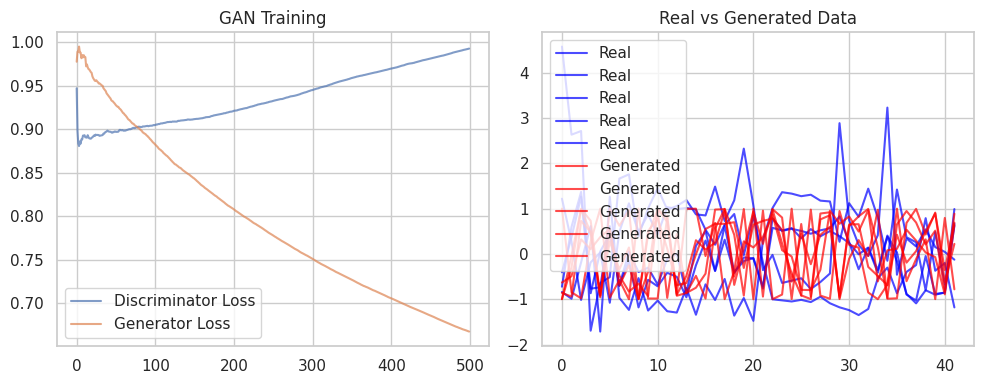

In [36]:
# --- Training GAN ---
def train_gan(generator, discriminator, combined, X_train, epochs=500, batch_size=128):
    """Fast GAN training"""

    # discriminator and generator losses
    d_losses = []
    g_losses = []

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_data = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, LATENT_DIM))
        fake_data = generator.predict(noise, verbose=0)

        # Train on real (label=1) and fake (label=0)
        d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, LATENT_DIM))
        g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

        d_losses.append(d_loss[0])
        g_losses.append(g_loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs} - D Loss: {d_loss[0]:.4f}, G Loss: {g_loss:.4f}")

    return d_losses, g_losses

print("Training GAN...")
d_losses, g_losses = train_gan(generator, discriminator, combined, X_train, epochs=500)

# Plot training
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(d_losses, label='Discriminator Loss', alpha=0.7)
plt.plot(g_losses, label='Generator Loss', alpha=0.7)
plt.title('GAN Training')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
# Show some generated samples vs real samples
noise = np.random.normal(0, 1, (5, LATENT_DIM))
generated_samples = generator.predict(noise)
real_samples = X_train[:5]

plt.plot(real_samples.T, alpha=0.7, label='Real', color='blue')
plt.plot(generated_samples.T, alpha=0.7, label='Generated', color='red')
plt.title('Real vs Generated Data')
plt.legend()
plt.tight_layout()
plt.show()

### Anomaly Detection Process
1. **Compute anomaly scores**
The discriminator predicts scores for validation and test sets.
Anomaly score = 1 - discriminator output
(Higher = more likely to be an anomaly)

2. **Threshold Optimization on Validation Set**
Calculate anomaly scores for all samples in the validation set (which contains both normal and anomaly data).
Test different threshold values across the range of reconstruction errors.
For each threshold, classify samples as:
     *   **anomaly** if Anomaly score > threshold.
     *   **normal** if Anomaly score ≤ threshold.

  Evaluate classification performance using F1-score.

3. **Final Classification on Test Set:**
Apply the optimized threshold to the test set reconstruction errors
Evaluate final model performance using the test set results


Computing anomaly scores on validation set...
Computing anomaly scores (ultra fast - single forward pass)...
Computing anomaly scores on test set...
Computing anomaly scores (ultra fast - single forward pass)...


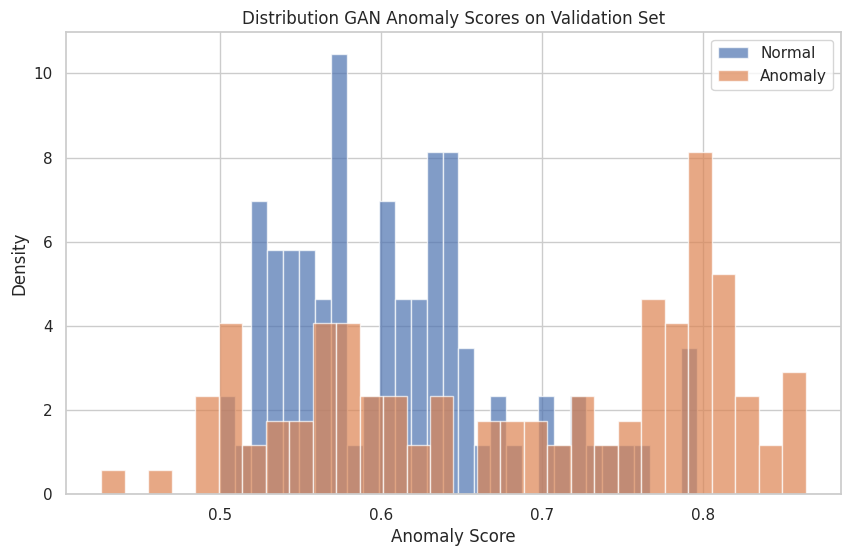

ROC AUC on validation set: 0.6818


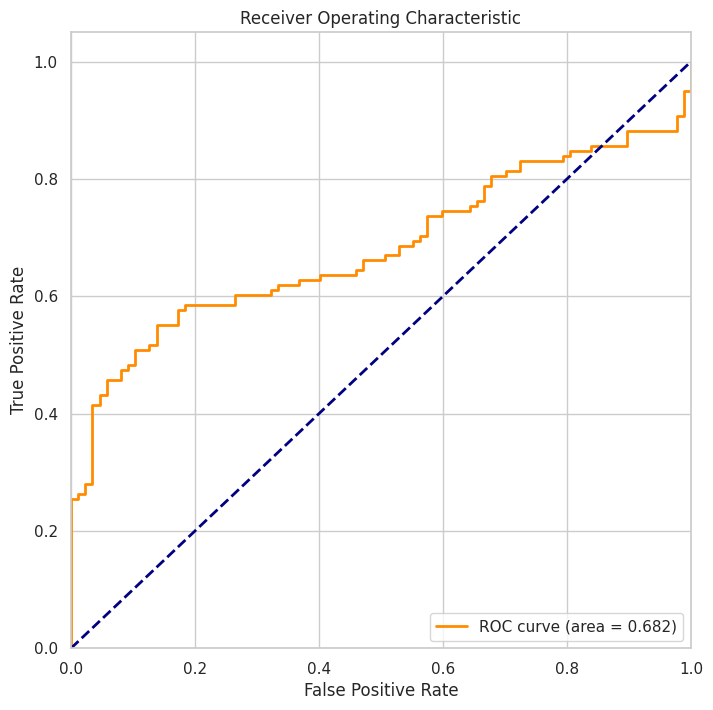


Best threshold: 0.5543
Precision: 0.605, Recall: 0.831, F1: 0.700, Accuracy: 0.590


In [38]:
from sklearn.metrics import roc_curve, auc
# --- ANOMALY DETECTION ---
def compute_anomaly_scores(X, discriminator):
    """
    Real data -> high discriminator score (close to 1)
    Anomalous data -> low discriminator score (close to 0)
    """
    print("Computing anomaly scores (ultra fast - single forward pass)...")

    # Get discriminator predictions in batches
    batch_size = 512
    scores = []

    for i in range(0, len(X), batch_size):
        batch = X[i:i + batch_size]
        batch_scores = discriminator.predict(batch, verbose=0)
        scores.extend(batch_scores.flatten())

    # Convert to anomaly scores (lower discriminator score = higher anomaly score)
    anomaly_scores = 1 - np.array(scores)

    return anomaly_scores

# --- Compute scores ---
print("Computing anomaly scores on validation set...")
scores_cv = compute_anomaly_scores(X_cross_val, discriminator)

print("Computing anomaly scores on test set...")
scores_test = compute_anomaly_scores(X_test, discriminator)


# --- Evaluation ---
plt.figure(figsize=(10, 6))
plt.hist(scores_cv[y_cross_val == 0], bins=30, alpha=0.7, label='Normal', density=True)
plt.hist(scores_cv[y_cross_val == 1], bins=30, alpha=0.7, label='Anomaly', density=True)
plt.title('Distribution GAN Anomaly Scores on Validation Set')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# ROC AUC
fpr, tpr, thresholds = roc_curve(y_cross_val, scores_cv)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC on validation set: {roc_auc:.4f}")

# ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Find optimal threshold
best_f1 = 0
best_thresh = 0
best_metrics = None

for thresh in np.linspace(np.percentile(scores_cv, 10), np.percentile(scores_cv, 99), 100):
    y_pred_cv = (scores_cv > thresh).astype(int)
    prec = precision_score(y_cross_val, y_pred_cv)
    rec = recall_score(y_cross_val, y_pred_cv)
    f1_cv = f1_score(y_cross_val, y_pred_cv)
    acc = accuracy_score(y_cross_val, y_pred_cv)

    if f1_cv > best_f1:
        best_f1 = f1_cv
        best_thresh = thresh
        best_metrics = (prec, rec, f1_cv, acc)

prec, rec, f1_cv, acc = best_metrics
print(f"\nBest threshold: {best_thresh:.4f}")
print(f"Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1_cv:.3f}, Accuracy: {acc:.3f}")



### Evaluation & Visualization
Compute and displays the model's performance on the test set:

*   Confusion Matrix
*   Accuracy
*   Precision
*   Recall
*   F1 Score






--- Final Evaluation Metrics on Test Set ---
Confusion Matrix:
[[ 26  62]
 [ 17 102]]
Accuracy:  0.6184
Precision: 0.6220
Recall:    0.8571
F1 Score:  0.7208


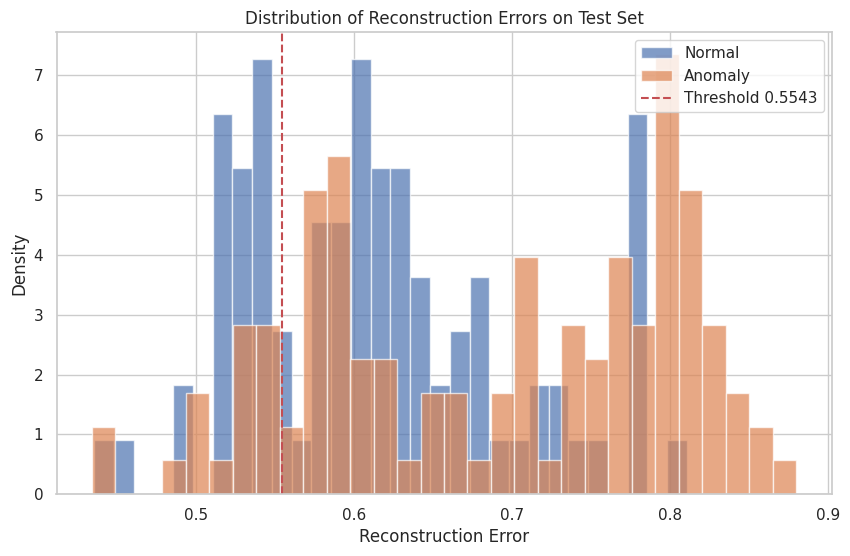

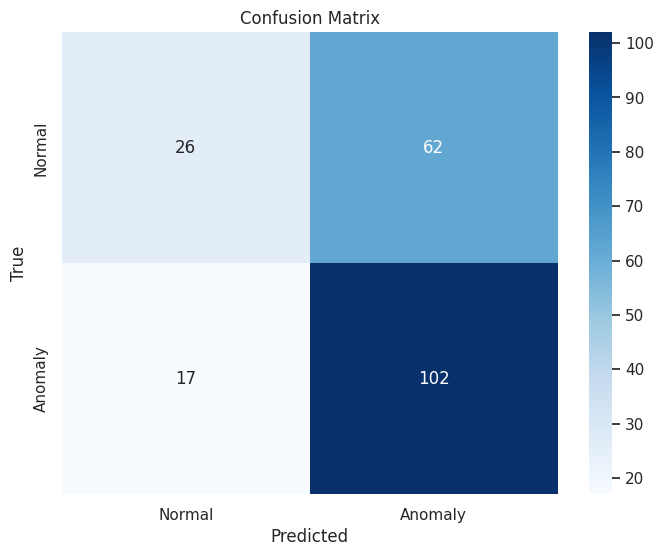

In [39]:
# Final evaluation
y_pred_test = (scores_test > best_thresh).astype(int)
cm = confusion_matrix(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

print("\n--- Final Evaluation Metrics on Test Set ---")
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# --- Display the distribution of reconstruction error scores on the test set ---
plt.figure(figsize=(10, 6))
plt.hist(scores_test[y_test == 0], bins=30, alpha=0.7, label='Normal', density=True)
plt.hist(scores_test[y_test == 1], bins=30, alpha=0.7, label='Anomaly', density=True)
plt.axvline(best_thresh, color='r', linestyle='--', label=f'Threshold {best_thresh:.4f}')
plt.title('Distribution of Reconstruction Errors on Test Set')
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# --- Confusion matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()